In [109]:
import fitdecode

import numpy as np
import matplotlib.pyplot as plt

In [110]:
filename = "15941962144_ACTIVITY.fit"
#filename = "15560725866_ACTIVITY.fit"
#filename = "11924306356_ACTIVITY.fit"

entries = []
with fitdecode.FitReader(f"data/{filename}") as fit:
    for frame in fit:
        if frame.frame_type == fitdecode.FIT_FRAME_DATA:
            if frame.name == "record":
                # print(frame.name)
                element = dict()
                for field in frame.fields:
                    if field.field is not None:
                        # print(field.field.name, field.value, field.units)
                        element[field.field.name] = dict()
                        element[field.field.name]["value"] = field.value
                        element[field.field.name]["unit"] = field.units
                entries.append(element)
                # print()

In [111]:
def select_data(entries, key):
    data = []
    for entry in entries:
        if key in entry.keys():
            unit = entry[key]["unit"]
            data.append(entry[key]["value"])
    return data, unit

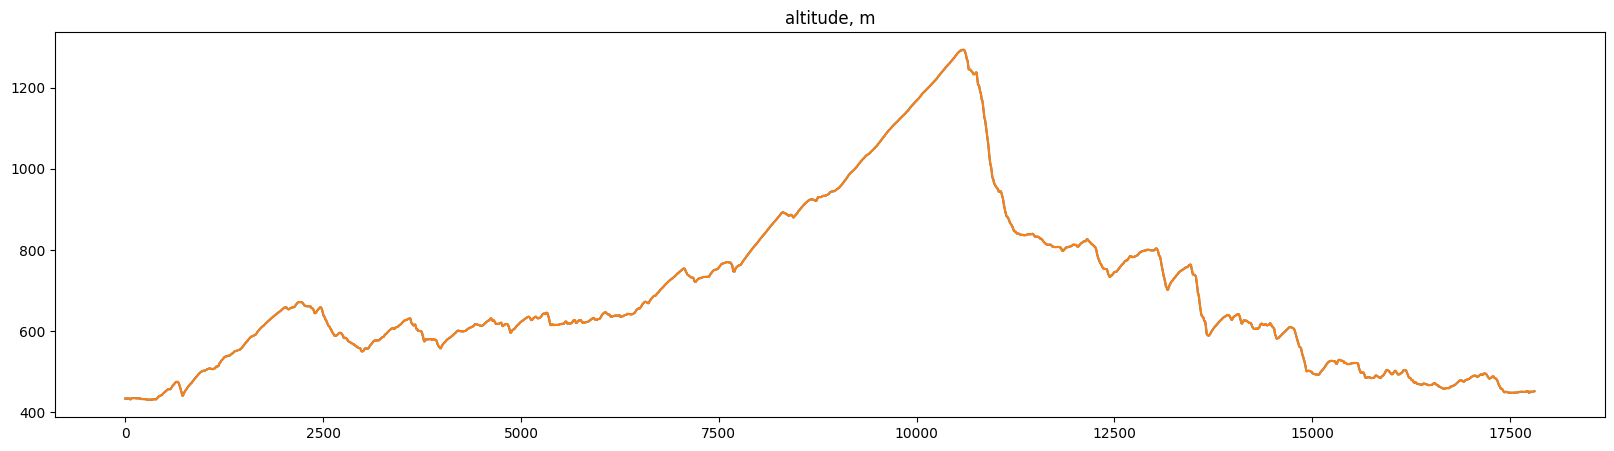

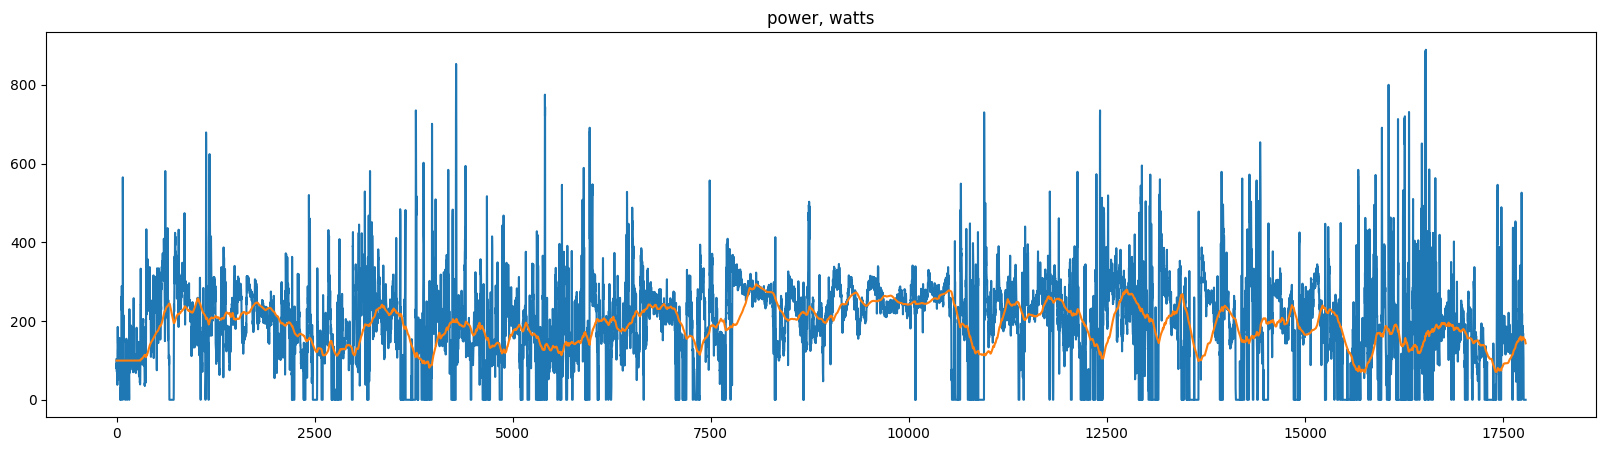

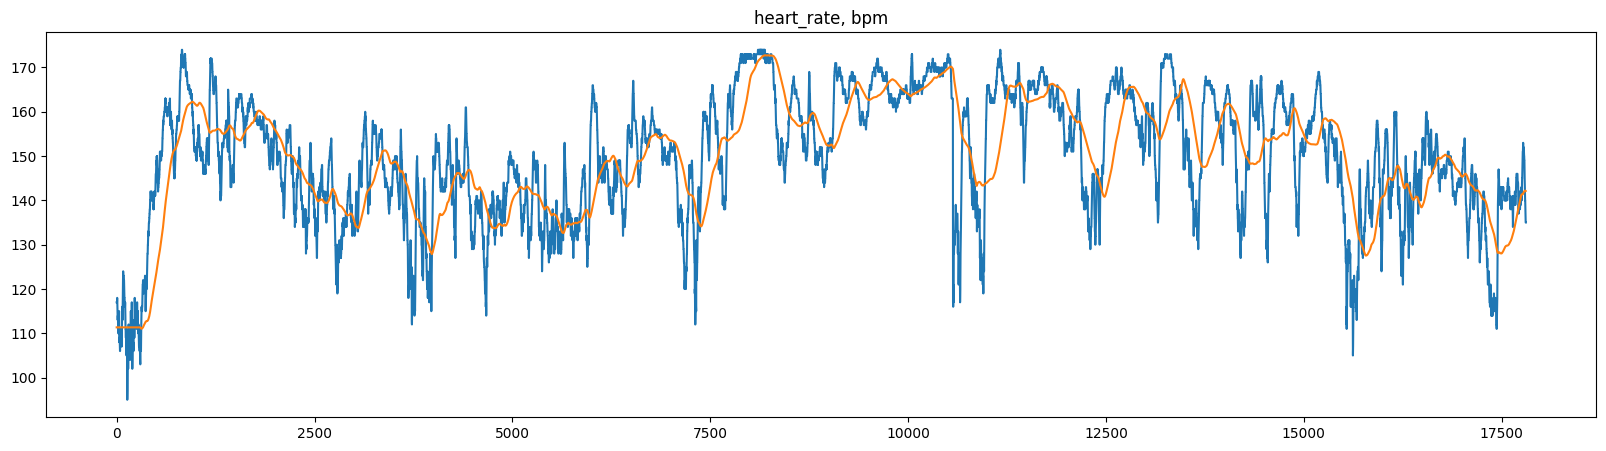

In [112]:
windows = [1, 60 * 5, 60 * 5]
keys = ["altitude", "power", "heart_rate"]

for i, (key, window) in enumerate(zip(keys, windows)):
    fig, axes = plt.subplots(1, 1, figsize=(20, 5))
    
    data, unit = select_data(entries, key)
    data = [0 if data_ is None else data_ for data_ in data]
    data_smooth = [np.mean(data[i:i + window]) for i in range(0, len(data) - window)]
    data_smooth = [*np.ones([window]) * data_smooth[0], *data_smooth]
    
    axes.plot(data)
    axes.plot(data_smooth)
    axes.set_title(f"{key}, {unit}")
    
    plt.show()